# **PHÂN TÍCH VÀ DỰ BÁO BIẾN ĐỘNG GIÁ CỔ PHIẾU**    
Họ và tên: Chu Dương Huy Phước  
Vị trí apply: AI Engineer Intern



In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

# **I. Đọc và xử lí dữ liệu**
Sau khi xem qua dữ liệu stock của các công ty, ta tính hệ số tương quan (Correlation) giữa các feature để loại bỏ bớt các feature tương quan yếu hoặc không có tương quan với nhau


In [12]:
stock_files = ['FPT.csv','MSN.csv','PNJ.csv','VIC.csv']

stock_df = [pd.read_csv(file) for file in stock_files]

for i,df in enumerate(stock_df):
    print(df.head())


  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0
  Ticker        Date/Time  Open  High   Low  Close  Volume  Open Interest
0    MSN  12/25/2017 9:15  73.1  73.1  73.1   73.1    4210              0
1    MSN  12/25/2017 9:16  73.0  73.0  73.0   73.0    5000              0
2    MSN  12/25/2017 9:18  73.5  73.5  73.5   73.5     210              0
3    MSN  12/25/2017 9:20  73.2  73.5  73.1   73.1    2050              0
4    MSN  12/25/2017 9:21  73.0  73.0  73.0   73.0    1380              0
  Ticker       Date/Time   Open   High    Low  Close  Volume  Open Interest
0    PNJ  2/28/201

Sau khi tính hệ số tương quan (Correlation) ta thấy cột "Volume" và "Open Interest" gần như không có tương quan hoặc tương quan yếu với các cột còn lại. Để dễ quan sát hơn ta vẽ heatmap của các cột và bar chart hệ số tương quan giữa các cột ra để dễ quan sát.
Sau khi quan sát, ta có thể bỏ các cột "Volume" và "Open Interest" và chỉ giữ các cột "Open", "High", "Low", "Close" làm feature để dự đoán

Correlation for FPT.csv
                   Open      High       Low     Close    Volume  Open Interest
Open           1.000000  0.999982  0.999980  0.999970  0.077920            NaN
High           0.999982  1.000000  0.999968  0.999982  0.078940            NaN
Low            0.999980  0.999968  1.000000  0.999980  0.076826            NaN
Close          0.999970  0.999982  0.999980  1.000000  0.077944            NaN
Volume         0.077920  0.078940  0.076826  0.077944  1.000000            NaN
Open Interest       NaN       NaN       NaN       NaN       NaN            NaN


c:\Users\Huy Phuoc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\Huy Phuoc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Correlation for MSN.csv
                   Open      High       Low     Close    Volume  Open Interest
Open           1.000000  0.999946  0.999962  0.999940 -0.039262            NaN
High           0.999946  1.000000  0.999910  0.999948 -0.038576            NaN
Low            0.999962  0.999910  1.000000  0.999960 -0.039693            NaN
Close          0.999940  0.999948  0.999960  1.000000 -0.039188            NaN
Volume        -0.039262 -0.038576 -0.039693 -0.039188  1.000000            NaN
Open Interest       NaN       NaN       NaN       NaN       NaN            NaN
Correlation for PNJ.csv
                   Open      High       Low     Close    Volume  Open Interest
Open           1.000000  0.998752  0.999072  0.998392 -0.050688            NaN
High           0.998752  1.000000  0.998090  0.998738 -0.046370            NaN
Low            0.999072  0.998090  1.000000  0.999091 -0.053304            NaN
Close          0.998392  0.998738  0.999091  1.000000 -0.050665            NaN
Volu

c:\Users\Huy Phuoc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\Huy Phuoc\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Correlation for VIC.csv
                   Open      High       Low     Close    Volume  Open Interest
Open           1.000000  0.999946  0.999949  0.999917 -0.016135            NaN
High           0.999946  1.000000  0.999901  0.999952 -0.015678            NaN
Low            0.999949  0.999901  1.000000  0.999941 -0.016563            NaN
Close          0.999917  0.999952  0.999941  1.000000 -0.016064            NaN
Volume        -0.016135 -0.015678 -0.016563 -0.016064  1.000000            NaN
Open Interest       NaN       NaN       NaN       NaN       NaN            NaN


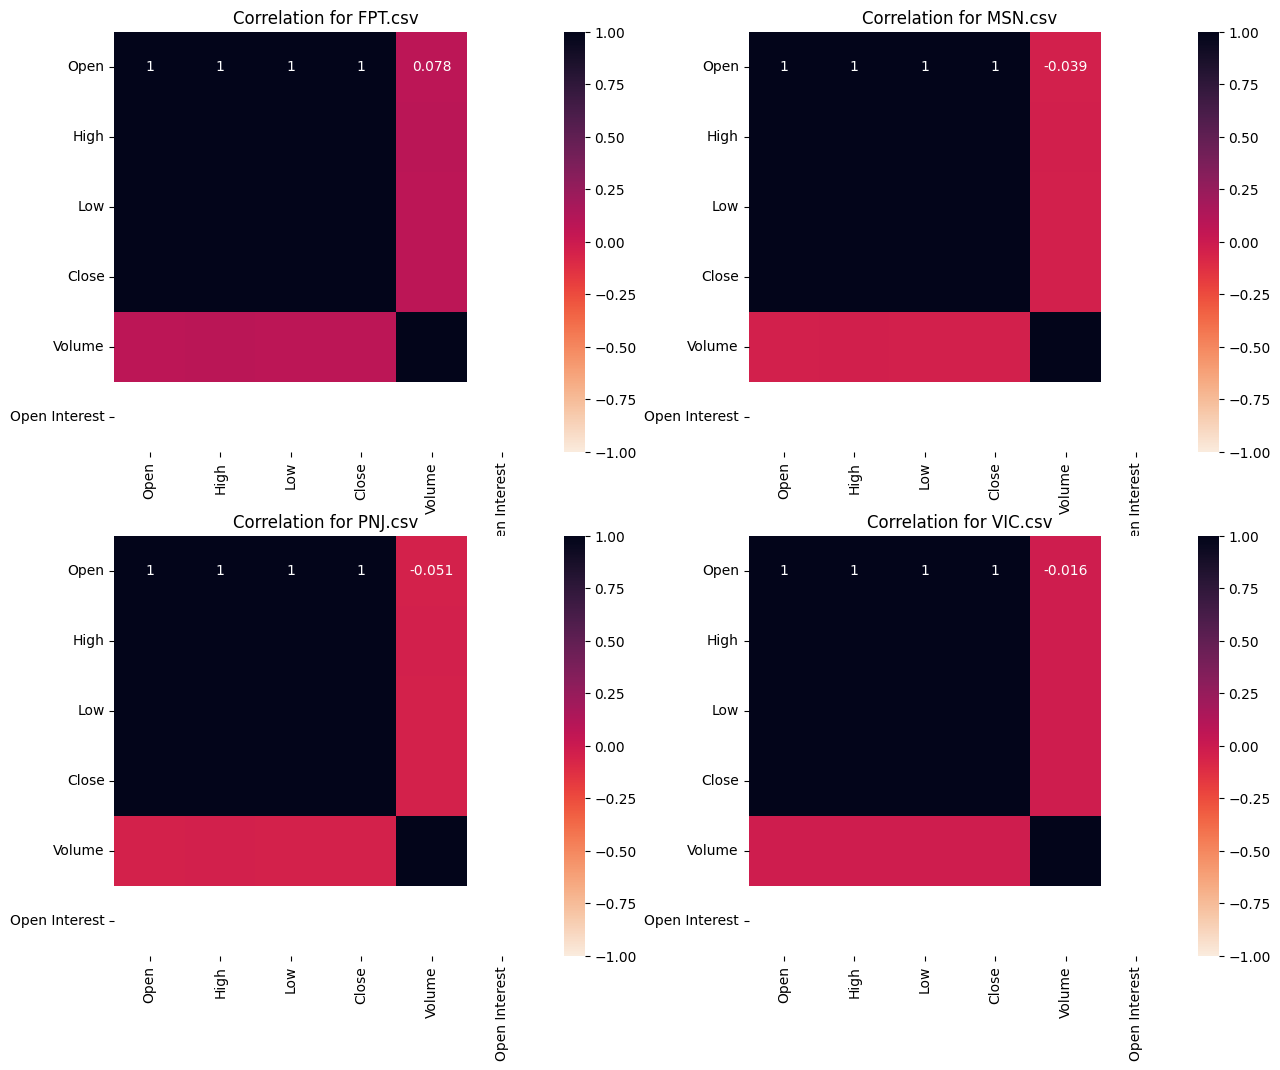

In [13]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
for i,df in enumerate(stock_df):
    print(f"Correlation for {stock_files[i]}")
    sel_col = df.select_dtypes(include='number')
    corr_stock=sel_col.corr()
    print(corr_stock)
    
    sns.heatmap(corr_stock,vmin=-1,vmax=1,annot=True,cmap="rocket_r",ax=axes.flatten()[i])
    axes.flatten()[i].set_title(f'Correlation for {stock_files[i]}')

    
plt.show()

Từ biểu đồ sự tương quan giữa các feature ở dưới ta có thể bỏ đi cột "Volume" và "Open Interest"

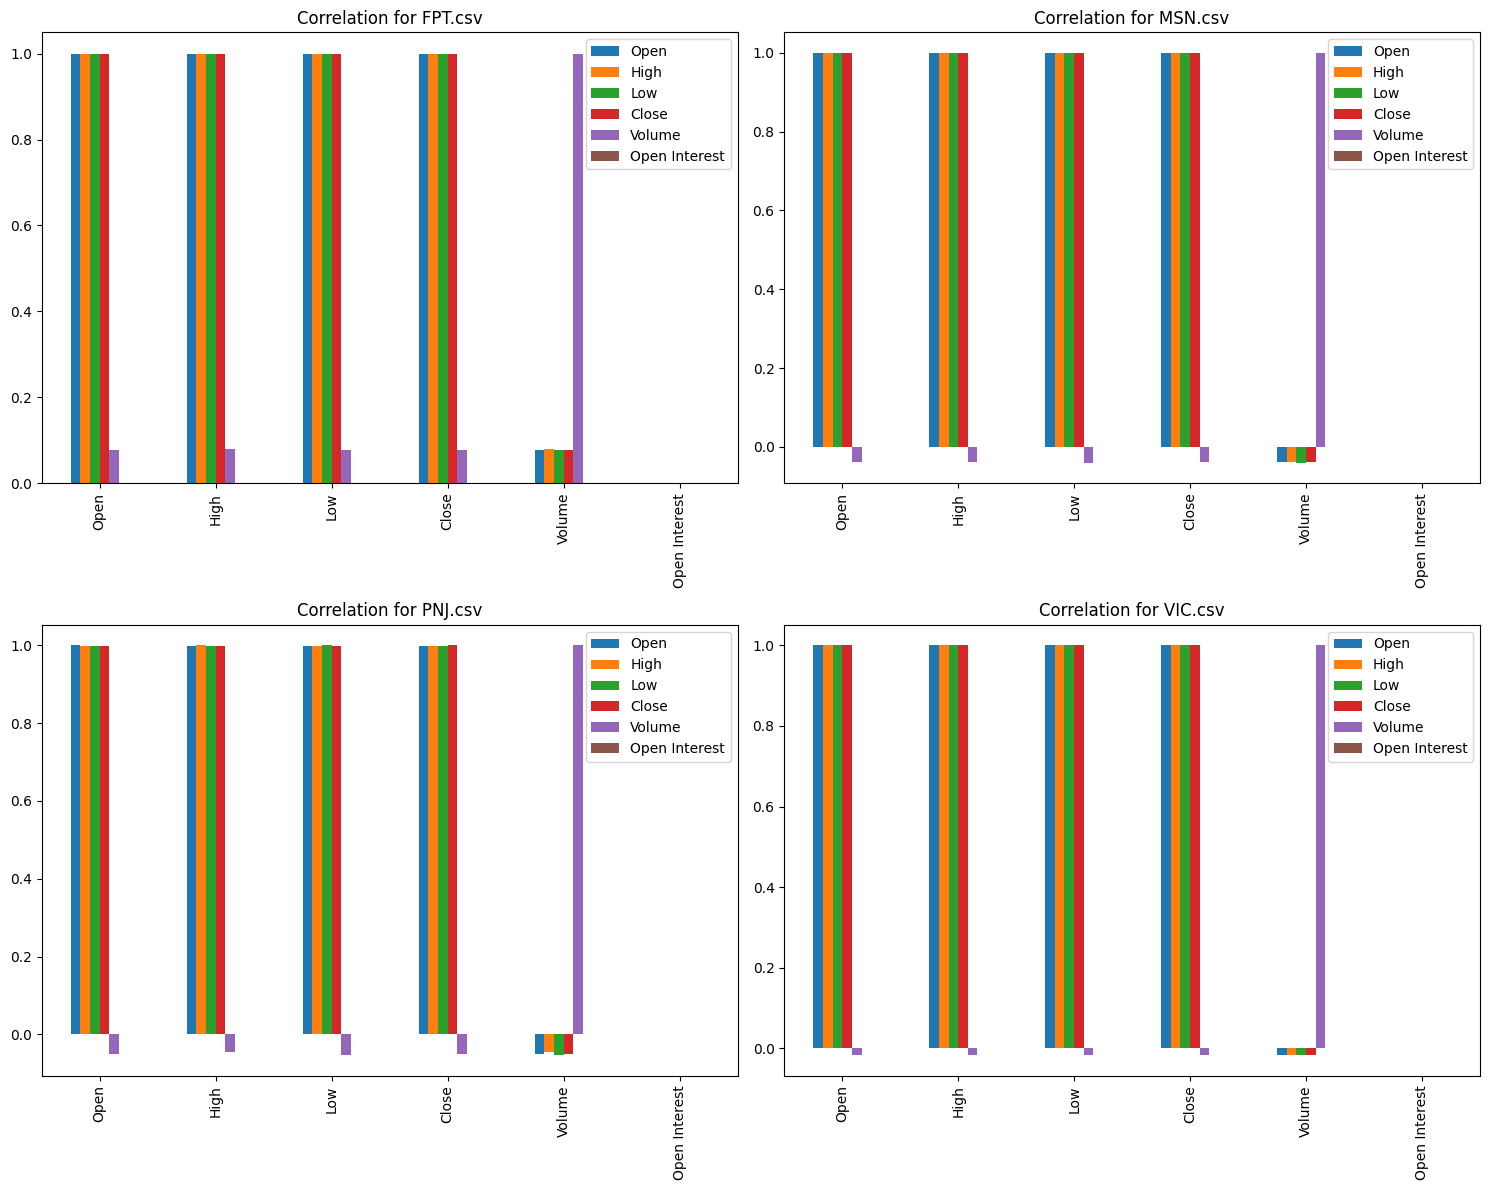

In [14]:
fig,axes = plt.subplots(2,2,figsize=(15,12))
for i,df in enumerate(stock_df):
    
    sel_col = df.select_dtypes(include='number')
    corr_stock=sel_col.corr()

    ax = axes[i//2,i%2]
    corr_stock.plot(kind="bar",ax=ax)
    ax.set_title(f"Correlation for {stock_files[i]}")
    
plt.tight_layout()
plt.show()

# **II. Tiền xử lí dữ liệu**  
Trước hết, ta thêm cột biến động giá(Stock_change_value) vào dataframe làm target cần dự đoán.  



In [15]:
for df in stock_df:
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df['Stock_change_value'] = df['Close'].shift(-1) - df['Close']

In [ ]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step, 3]) 
    return np.array(X), np.array(y)
# Tạo dataset để chuẩn bị train (data đầu vào là dữ liệu đã được chuẩn hóa)

# **Ta sử dụng LSTM(Long Short-Term Memory) để làm mô hình dự đoán biến động giá cổ phiếu**
Đầu tiên ta cần chuẩn hóa dữ liệu, đưa dữ liệu về khoảng [0,1] bằng MinMaxScaler, sau khi chuẩn hóa dữ liệu, ta chia tập dữ liệu ra thành tập train và tập test  
Sau khi chia và huấn luyện mô hình, ta đánh giá mô hình bằng R2_score và MSE, xem liệu mô hình có tương thích phù hợi với dữ liệu hay không.  



Epoch 1/10

1403/1403 [==============================] - 24s 13ms/step - loss: 0.1172 - val_loss: 0.0064
Epoch 2/10
1403/1403 [==============================] - 27s 19ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 3/10
1403/1403 [==============================] - 26s 19ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 4/10
1403/1403 [==============================] - 22s 15ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 5/10
1403/1403 [==============================] - 20s 14ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 6/10
1403/1403 [==============================] - 26s 19ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 7/10
1403/1403 [==============================] - 34s 24ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 8/10
1403/1403 [==============================] - 22s 15ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 9/10
1403/1403 [==============================] - 25s 18ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 10/10
609/609 [==============================] - 5s 6ms/

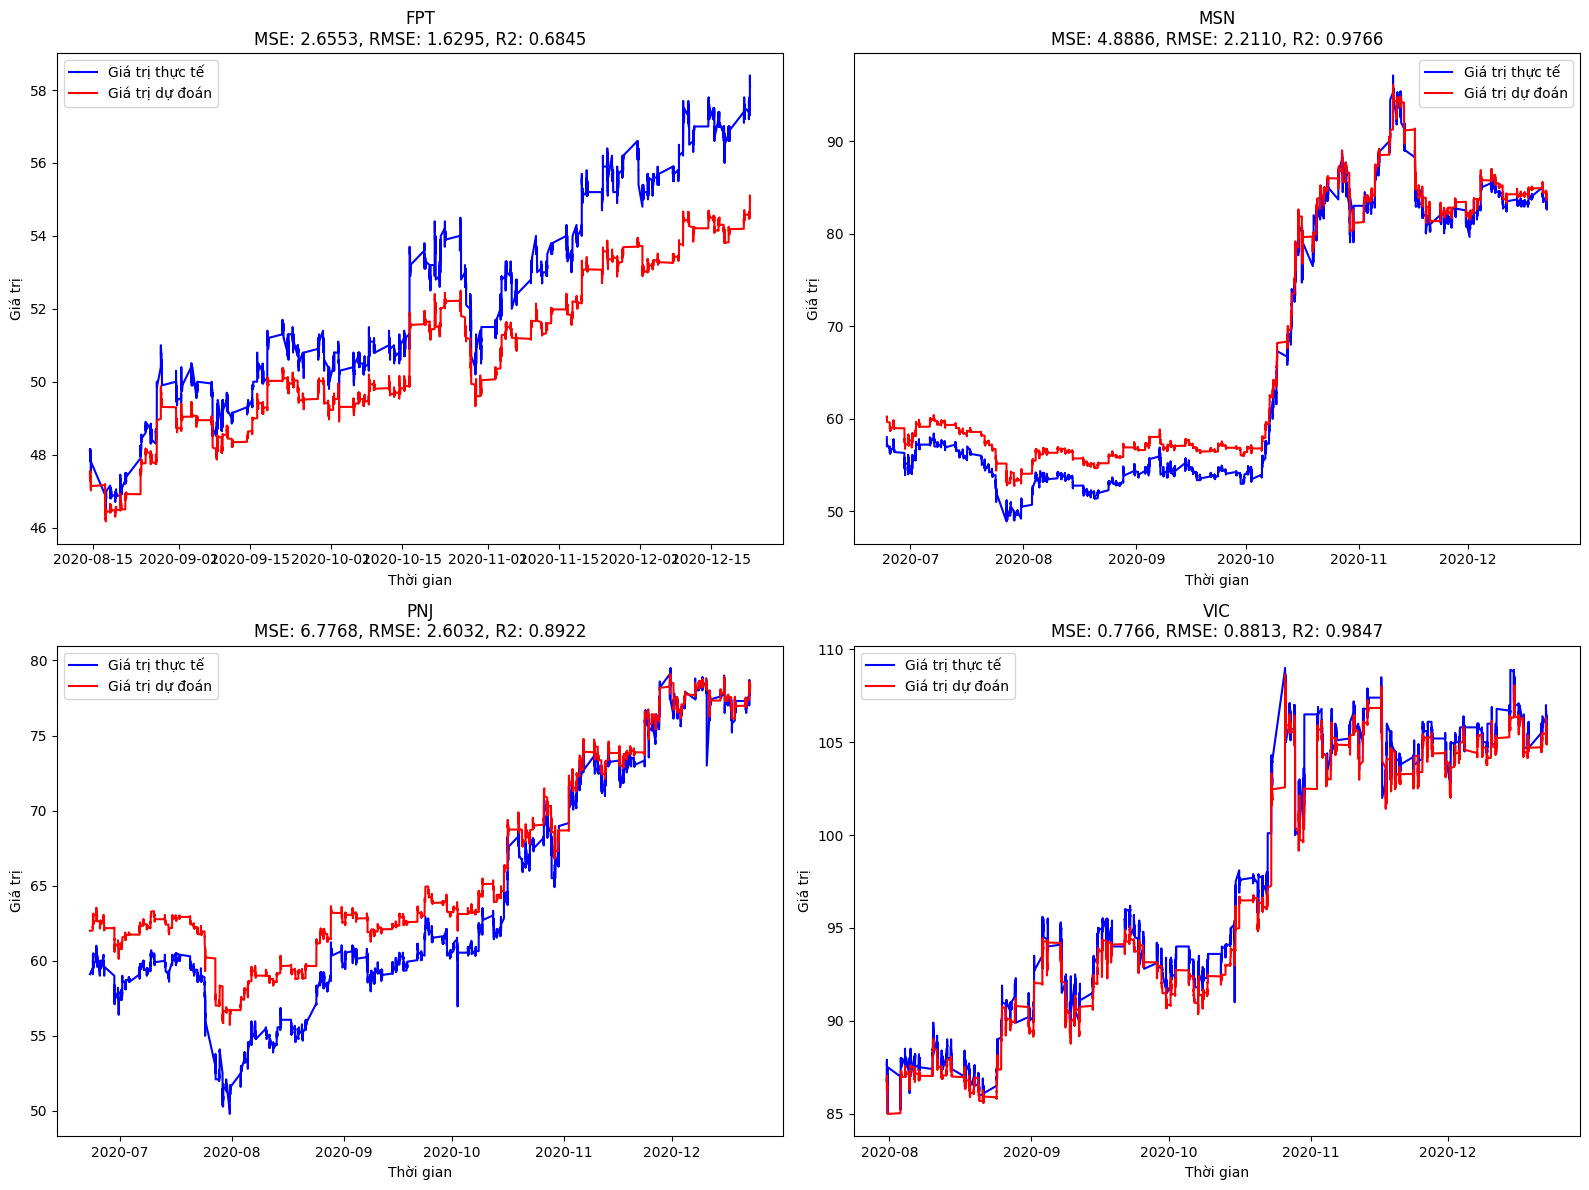

In [16]:

def process_stock_data(df, time_step=10):
    features = ['Open', 'High', 'Low', 'Close']
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[features])

    X, y = create_dataset(scaled_data, time_step)

    X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
    y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]
    #Chia dữ liệu ra thành tập train và tập test
    
    #Huấn luyện mô hình dùng LSTM và đánh giá mô hình bằng r2_Score và MSE
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(time_step, len(features)), # Sử dụng regularizer để tránh overfitting
                   kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))
    model.add(Dropout(0.5)) # Dùng Dropout để loại bớt đi ngẫu nhiên 50% giá trị tránh overfitting
    model.add(LSTM(128, return_sequences=False, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_regularizer=l2(0.01)))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=10, batch_size=50, validation_split=0.1, verbose=1)

    predictions = model.predict(X_test)


    #Sau khi huấn luyện, ta transform tập y_test và predict về lại dạng gốc ban đầu để tính toán MSE
    y_test_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1)), axis=1))[:, 3]
    predictions_inverse = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions), axis=1))[:, 3]

    mse = mean_squared_error(y_test_inverse, predictions_inverse)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inverse, predictions_inverse)

    return df['Date/Time'].iloc[time_step + len(X_train):].values, y_test_inverse, predictions_inverse, mse, rmse, r2


# Vẽ đồ thị minh họa giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(16, 12))

for i, df in enumerate(stock_df):
    dates, y_test, predictions, mse, rmse, r2 = process_stock_data(df)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(dates, y_test, label='Giá trị thực tế', color='blue')
    plt.plot(dates, predictions, label='Giá trị dự đoán', color='red')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá trị')
    plt.title(f'{stock_files[i].split(".")[0]}\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')
    plt.legend()
    plt.tight_layout()

plt.show()

# **III. Kết Luận**  
Từ các biểu đồ ở trên ta nhận thấy với LSTM, và R2_score nằm từ 0.6 trở lên, nhận thấy rằng mô hình đang hoạt động khá tốt với dữ liệu, với MSE cũng nhỏ, cho thấy lỗi rất bé, nhận xét rằng mô hình phù hợp và hoạt động khá tốt với dữ liệu cổ phiếu cung được cung cấp.
